In [2]:
import pandas as pd
import numpy as np

In [3]:
train_df=pd.read_csv('../data/train.csv')

In [4]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test_df=pd.read_csv('../data/test.csv')

In [6]:
test_df.shape

(5681, 11)

In [7]:
train_df.shape

(8523, 12)

# Step 1: Hypothesis

1. Tier 1 outlet store should have higher sales
2. Sale should vary by the type of outlet
3. Older outlet establishment might have higher sales
4. High outlet size mean high sales
5. Items with higher visibility should have high sales
6. Daily use items should have high sales

# Step 2: Data Exploration

In [8]:
#Lets combine both data sets train & test in to one

train_df['source']='train'
test_df['source']='test'

data=pd.concat([train_df,test_df],ignore_index=True)

c:\users\rajin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [9]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [10]:
data.shape

(14204, 13)

In [11]:
#Check missing values

data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [12]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


1. Item visibility minimum zero does not make any sense. If the item is available in store its visibility has to be greater than 0
2. Outlet establishment year range from 1985 to 2009. For modeling purpose it will be better to compute the age of outlet.inf

In [13]:
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

1. There are 1559 distinct items and 10 stores
2. there are 16 different item types 

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 998.8+ KB


In [15]:
data.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
source                        object
dtype: object

In [16]:
# Categorical Columns

cat_col=[x for x in data.dtypes.index if data.dtypes[x]=='object']
cat_col =[x for x in cat_col if x not in ['Item_Identifier','Outlet_Identifier','source']]

for x in cat_col:
    print('Categorical Values for %s'%x)
    print(data[x].value_counts())
    print('\n')

Categorical Values for Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


Categorical Values for Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64


Categorical Values for Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64


Categorical Values for Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64


Categorical Values for Outlet_Type
Supermarket Typ

Item_Fat_Content: Some of Low Fat and Regular values miscoded.
Item_Type: Not all Item_Type have substantial counts. May be we can combine some together
Outlet_Type: May be Supermarket type2 & type3 can be combined together 

# Step 3: Data Cleaning

Imputing missing values. 
Outlet_Size and Item_Weight have missing values and Item_Visibility has 0 as value which is not correct

In [17]:
#Compute the avg weight of each item

avg_weight=data.groupby(['Item_Identifier'])['Item_Weight'].mean().reset_index()
avg_weight.set_index(keys='Item_Identifier',inplace=True)
avg_weight.head()
avg_weight.loc['DRA12']

Item_Weight    11.6
Name: DRA12, dtype: float64

In [18]:
mbool=data['Item_Weight'].isnull()

In [19]:
data.loc[mbool]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
18,Low Fat,DRI11,113.2834,2303.6680,Hard Drinks,0.034238,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
21,Regular,FDW12,144.5444,4064.0432,Baking Goods,0.035400,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
23,Low Fat,FDC37,107.6938,214.3876,Baking Goods,0.057557,NaN,1985,OUT019,Tier 1,Small,Grocery Store,train
29,Regular,FDC14,43.6454,125.8362,Canned,0.072222,NaN,1985,OUT019,Tier 1,Small,Grocery Store,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14178,Regular,FDX32,143.6786,NaN,Fruits and Vegetables,0.099375,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,test
14179,Low Fat,FDC39,207.8296,NaN,Dairy,0.158425,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,test
14184,Low Fat,DRG37,155.7972,NaN,Soft Drinks,0.000000,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,test
14188,Low Fat,DRE03,46.0718,NaN,Dairy,0.024110,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,test


In [20]:
data.loc[mbool,'Item_Weight'] =data.loc[mbool,'Item_Identifier'].apply(lambda x: avg_weight.loc[x].values[0])
print ('Orignal #missing: ',sum(mbool))
print ('Final #missing: ',sum(data['Item_Weight'].isnull()))

Orignal #missing:  2439
Final #missing:  0


## Now lets Impute Outlet Size

In [21]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Find the most common outlet size by outlet type 

In [22]:
from scipy import stats
out_size_mode=data.groupby(['Outlet_Type'])['Outlet_Size'].apply(lambda x: stats.mode(x).mode[0]).reset_index()
out_size_mode.set_index(keys='Outlet_Type',inplace=True)
out_size_mode.head()

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [23]:
mbool=data['Outlet_Size'].isnull()
data[mbool]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,NaN,Grocery Store,train
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,NaN,Supermarket Type1,train
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,NaN,Supermarket Type1,train
25,Low Fat,NCD06,45.9060,838.9080,Household,0.099887,13.000,2007,OUT017,Tier 2,NaN,Supermarket Type1,train
28,Regular,FDE51,45.5086,178.4344,Dairy,0.161467,5.925,1998,OUT010,Tier 3,NaN,Grocery Store,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14191,Low Fat,FDC44,115.1518,NaN,Fruits and Vegetables,0.288892,15.600,1998,OUT010,Tier 3,NaN,Grocery Store,test
14193,Regular,FDO03,229.4352,NaN,Meat,0.037092,10.395,2007,OUT017,Tier 2,NaN,Supermarket Type1,test
14201,Low Fat,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10.000,2002,OUT045,Tier 2,NaN,Supermarket Type1,test
14202,Regular,FDJ26,214.6218,NaN,Canned,0.000000,15.300,2007,OUT017,Tier 2,NaN,Supermarket Type1,test


In [24]:
data.loc[mbool,'Outlet_Size']=data.loc[mbool,'Outlet_Type'].apply(lambda x: out_size_mode.loc[x].values[0])

print('Original Missing: ',sum(mbool))
print('Now Missing: ',data['Outlet_Size'].isnull().sum())

Original Missing:  4016
Now Missing:  0


In [25]:
data[mbool]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,Small,Grocery Store,train
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,Small,Supermarket Type1,train
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,Small,Supermarket Type1,train
25,Low Fat,NCD06,45.9060,838.9080,Household,0.099887,13.000,2007,OUT017,Tier 2,Small,Supermarket Type1,train
28,Regular,FDE51,45.5086,178.4344,Dairy,0.161467,5.925,1998,OUT010,Tier 3,Small,Grocery Store,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14191,Low Fat,FDC44,115.1518,NaN,Fruits and Vegetables,0.288892,15.600,1998,OUT010,Tier 3,Small,Grocery Store,test
14193,Regular,FDO03,229.4352,NaN,Meat,0.037092,10.395,2007,OUT017,Tier 2,Small,Supermarket Type1,test
14201,Low Fat,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10.000,2002,OUT045,Tier 2,Small,Supermarket Type1,test
14202,Regular,FDJ26,214.6218,NaN,Canned,0.000000,15.300,2007,OUT017,Tier 2,Small,Supermarket Type1,test


## Fix 0 values of Item_Visibility

Get the avg item_visibility by item_identifier


In [26]:
item_vis_avg=data.groupby(['Item_Identifier'])['Item_Visibility'].mean().reset_index()
item_vis_avg.set_index(keys='Item_Identifier',inplace=True)
item_vis_avg.head()

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799


In [27]:
mbool=(data['Item_Visibility']==0)
data[mbool]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.0,19.200,1998,OUT010,Tier 3,Small,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.0,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,train
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.0,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
10,Low Fat,FDY07,45.5402,1516.0266,Fruits and Vegetables,0.0,11.800,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
32,Low Fat,FDP33,256.6672,3068.0064,Snack Foods,0.0,18.700,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14166,Regular,FDQ19,244.3512,NaN,Fruits and Vegetables,0.0,7.350,1985,OUT019,Tier 1,Small,Grocery Store,test
14171,Regular,FDK26,187.5240,NaN,Canned,0.0,5.460,1985,OUT027,Tier 3,Medium,Supermarket Type3,test
14177,Low Fat,FDQ57,144.5760,NaN,Snack Foods,0.0,7.275,1987,OUT013,Tier 3,High,Supermarket Type1,test
14184,Low Fat,DRG37,155.7972,NaN,Soft Drinks,0.0,16.200,1985,OUT027,Tier 3,Medium,Supermarket Type3,test


In [28]:
data.loc[mbool,'Item_Visibility']=data.loc[mbool,'Item_Identifier'].apply(lambda x: item_vis_avg.loc[x].values[0])
print('Original zero values:',sum(mbool))
print('Now zero values: ', sum(data['Item_Visibility']==0))

Original zero values: 879
Now zero values:  0


In [29]:
data[mbool]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.200,1998,OUT010,Tier 3,Small,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.009780,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,train
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.057059,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
10,Low Fat,FDY07,45.5402,1516.0266,Fruits and Vegetables,0.040627,11.800,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
32,Low Fat,FDP33,256.6672,3068.0064,Snack Foods,0.093093,18.700,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14166,Regular,FDQ19,244.3512,NaN,Fruits and Vegetables,0.013907,7.350,1985,OUT019,Tier 1,Small,Grocery Store,test
14171,Regular,FDK26,187.5240,NaN,Canned,0.033583,5.460,1985,OUT027,Tier 3,Medium,Supermarket Type3,test
14177,Low Fat,FDQ57,144.5760,NaN,Snack Foods,0.024077,7.275,1987,OUT013,Tier 3,High,Supermarket Type1,test
14184,Low Fat,DRG37,155.7972,NaN,Soft Drinks,0.020225,16.200,1985,OUT027,Tier 3,Medium,Supermarket Type3,test


# Step 4: Feature Engineering

# 1. Consider combining Outlet_Type

In [30]:
data.groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [31]:
data.groupby(['Outlet_Type','Outlet_Location_Type'])['Item_Outlet_Sales'].mean()

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 1                   340.329723
                   Tier 3                   339.351662
Supermarket Type1  Tier 1                  2313.099451
                   Tier 2                  2323.990559
                   Tier 3                  2298.995256
Supermarket Type2  Tier 3                  1995.498739
Supermarket Type3  Tier 3                  3694.038558
Name: Item_Outlet_Sales, dtype: float64

There is significant difference between sales of Type 2 & Type3 Market hence will not be combining them

## 2. Determine another Item Visibility Variable with Means Ratio

We created hypothesis that product with higher visibility  are likely to sell more. But along with comparing products on absolute  terms, we should also look at the visibility of that product in particular store compared to visibility of that product in all other stores. We can use item_vis_avg computed earlier to calculate the mean ratio

In [32]:
data['Item_Visibility_Mean_Ratio'] = data.apply(lambda x: x['Item_Visibility']/item_vis_avg.loc[x['Item_Identifier']],axis=1)

In [33]:
data['Item_Visibility_Mean_Ratio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_Mean_Ratio, dtype: float64

## 3. Create a broad category of Item

In [34]:
data['Item_Category']= data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Category']=data['Item_Category'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
data['Item_Category'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Category, dtype: int64

In [35]:
data.groupby(['Item_Category','Item_Type'])['Item_Outlet_Sales'].agg(['mean','count']).reset_index().sort_values(by=['Item_Category','count'],ascending=False)

,Item_Category,Item_Type,mean,count
15,Non-Consumable,Household,2258.784300,910
14,Non-Consumable,Health and Hygiene,2010.000265,520
16,Non-Consumable,Others,1926.139702,169
9,Food,Fruits and Vegetables,2289.009592,1232
12,Food,Snack Foods,2277.321739,1200
8,Food,Frozen Foods,2132.867744,856
6,Food,Canned,2225.194904,649
3,Food,Baking Goods,1952.971207,648
7,Food,Dairy,2356.855838,542
10,Food,Meat,2158.977911,425


For now I will not combine Item_Type based on mean selling price and Item Category. 
In Non Consumable Others, Food Baking Goods and in Drinks Dairy have comparitively lower avg price but the count of these item type is low.

## 4. Calculate years of operation of store from Outlet_Establishment_Year

In [36]:
# As the sales data was collected in 2013, I am using 2013 to calculate years
data['Outlet_Years']=2013-data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

## 5. Fix the Item_Fat_Content values

In [37]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [38]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [39]:
# Update the Fat Content of Non Consumable to Non-Edible

data.loc[data['Item_Category']=='Non-Consumable','Item_Fat_Content']='Non-Edible'

In [40]:
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

## 6. Numerical and One hot Coding for Categorical Values

In [41]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Visibility_Mean_Ratio,Item_Category,Outlet_Years
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,0.931078,Food,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,0.933420,Drinks,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,0.960069,Food,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,1.000000,Food,15
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,1.000000,Non-Consumable,26


In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data['Outlet']=le.fit_transform(data['Outlet_Identifier'])

data.head()

var_mod=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Category','Outlet']

le=LabelEncoder()
for i in var_mod:
    data[i]=le.fit_transform(data[i])

In [43]:
#Get Dummies

data=pd.get_dummies(data,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Category','Outlet'])

In [44]:
data.dtypes

Item_Identifier                object
Item_MRP                      float64
Item_Outlet_Sales             float64
Item_Type                      object
Item_Visibility               float64
Item_Weight                   float64
Outlet_Establishment_Year       int64
Outlet_Identifier              object
source                         object
Item_Visibility_Mean_Ratio    float64
Outlet_Years                    int64
Item_Fat_Content_0              uint8
Item_Fat_Content_1              uint8
Item_Fat_Content_2              uint8
Outlet_Location_Type_0          uint8
Outlet_Location_Type_1          uint8
Outlet_Location_Type_2          uint8
Outlet_Size_0                   uint8
Outlet_Size_1                   uint8
Outlet_Size_2                   uint8
Outlet_Type_0                   uint8
Outlet_Type_1                   uint8
Outlet_Type_2                   uint8
Outlet_Type_3                   uint8
Item_Category_0                 uint8
Item_Category_1                 uint8
Item_Categor

In [45]:
data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head()

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


## 7. Export Final Data and Separate Train & Test Data

In [46]:
# Drop the columns which have been converted to  different types

data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [47]:
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

train.drop(['source'],axis=1,inplace=True)
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

#Export Files 

train.to_csv('../data/train_modified.csv',index=False)
test.to_csv('../data/test_modified.csv',index=False)


C:\Users\rajin\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [48]:
train.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Item_Visibility_Mean_Ratio,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,0.931078,14,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,0.933420,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,0.960069,14,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.017834,19.20,OUT010,1.000000,15,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.009780,8.93,OUT013,1.000000,26,0,1,...,0,1,0,0,0,0,0,0,0,0


# Step 5: Modeling

In [49]:
# Create function to run multiple algorithm using the function


from sklearn.model_selection import cross_val_score
from sklearn import metrics

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    alg.fit(dtrain[predictors],dtrain[target])
    
    train_predict=alg.predict(dtrain[predictors])
    
    cvs=cross_val_score(alg,X=dtrain[predictors],y=dtrain[target],cv=20, scoring='neg_mean_squared_error')
    cvs=np.sqrt(np.abs(cvs))
    
    print('RMSE is ', np.sqrt(metrics.mean_squared_error(train['Item_Outlet_Sales'].values,train_predict)))
    
    print('Mean error:', np.mean(cvs))
    print('STD error:', np.std(cvs))
    print('Min error:', np.min(cvs))
    print('Max error:', np.max(cvs))
    
    
    #predicting on test data
    
    dtest[target]=alg.predict(dtest[predictors])
    
    #Export final output file
    IDcol.append(target)
    
    submission = pd.DataFrame({x: dtest[x] for x in IDcol})
    submission.to_csv(filename,index=False)    

## Linear Regression Model

RMSE is  1127.5431870039
Mean error: 1129.1013950199917
STD error: 43.74758067823454
Min error: 1072.7617124816736
Max error: 1211.7082445310034


c:\users\rajin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


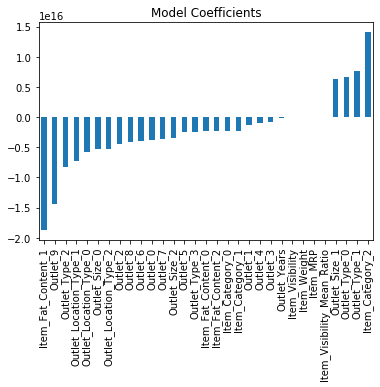

In [50]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

target='Item_Outlet_Sales'
IDcol=['Item_Identifier','Outlet_Identifier']
predictors = [x for x in train.columns if x not in ['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier']]

alg1 = LinearRegression(normalize=True)

modelfit(alg=alg1, dtrain=train, dtest=test, predictors=predictors, target=target, IDcol=IDcol, filename='../output/LinearRegression.csv')

coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

## Ridge Model

RMSE is  1128.6249817365358
Mean error: 1129.8816114842225
STD error: 44.60491566772174
Min error: 1075.5933988732845
Max error: 1216.7683204350772


c:\users\rajin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


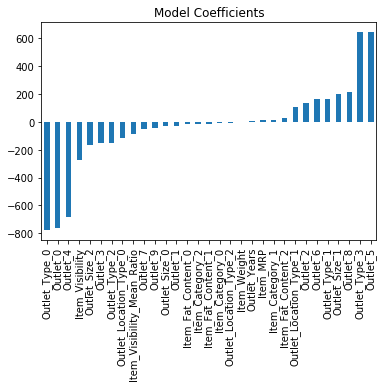

In [51]:
from sklearn.linear_model import Ridge

target='Item_Outlet_Sales'
IDcol=['Item_Identifier','Outlet_Identifier']
predictors = [x for x in train.columns if x not in [target]+IDcol]

alg2 = Ridge(alpha=0.05,normalize=True)

modelfit(alg=alg2, dtrain=train, dtest=test, predictors=predictors, target=target, IDcol=IDcol, filename='../output/RidgeOutput.csv')

coef1 = pd.Series(alg2.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

## Decision Tree

In [52]:
from sklearn.tree import DecisionTreeRegressor

RMSE is  1057.6934941675377
Mean error: 1091.4968931846695
STD error: 45.4200019619013
Min error: 1002.7950800985651
Max error: 1186.4108567725732


c:\users\rajin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


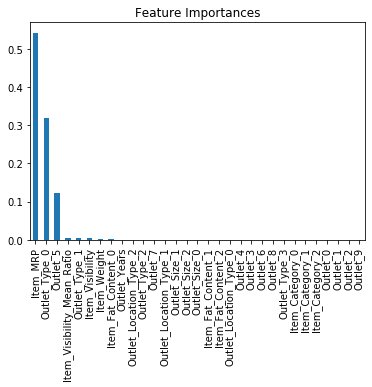

In [53]:


target='Item_Outlet_Sales'
IDcol=['Item_Identifier','Outlet_Identifier']
predictors = [x for x in train.columns if x not in [target]+IDcol]

alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

modelfit(alg=alg3, dtrain=train, dtest=test, predictors=predictors, target=target, IDcol=IDcol, filename='../output/DecisionTreeOutput.csv')

coef1 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef1.plot(kind='bar', title='Feature Importances')

RMSE is  1071.2364214016316
Mean error: 1096.1065402097997
STD error: 43.30211900031147
Min error: 1027.3440164414137
Max error: 1171.5022305730886


c:\users\rajin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


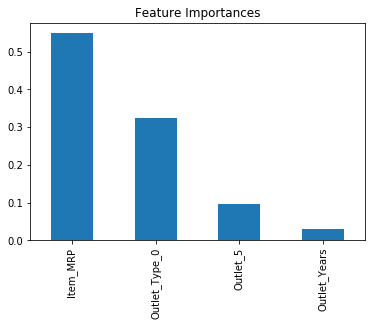

In [54]:
target='Item_Outlet_Sales'
IDcol=['Item_Identifier','Outlet_Identifier']
predictors = ['Item_MRP','Outlet_Type_0','Outlet_Years','Outlet_5']

alg4 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)

modelfit(alg=alg4, dtrain=train, dtest=test, predictors=predictors, target=target, IDcol=IDcol, filename='../output/DecisionTreeOutput_4Var.csv')

coef1 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef1.plot(kind='bar', title='Feature Importances')

## Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor

RMSE is  1073.4486193674975
Mean error: 1083.5657503211473
STD error: 43.65718767706261
Min error: 1020.0852183924642
Max error: 1161.6635752677357


c:\users\rajin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


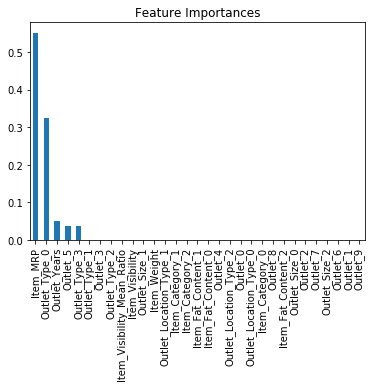

In [56]:

target='Item_Outlet_Sales'
IDcol=['Item_Identifier','Outlet_Identifier']
predictors = [x for x in train.columns if x not in [target]+IDcol]

alg5 = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=100)

modelfit(alg=alg5, dtrain=train, dtest=test, predictors=predictors, target=target, IDcol=IDcol, filename='../output/RandomForestOutput.csv')

coef1 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef1.plot(kind='bar', title='Feature Importances')

## GBM Model

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

RMSE is  1031.4984548577718
Mean error: 1085.957543618458
STD error: 46.504406226713726
Min error: 1009.1805366184904
Max error: 1172.8487360297463


c:\users\rajin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


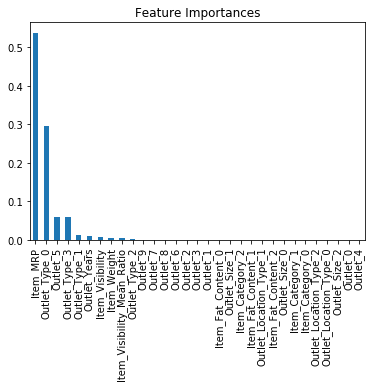

In [58]:
target='Item_Outlet_Sales'
IDcol=['Item_Identifier','Outlet_Identifier']
predictors = [x for x in train.columns if x not in [target]+IDcol]

alg6 = GradientBoostingRegressor()

modelfit(alg=alg6, dtrain=train, dtest=test, predictors=predictors, target=target, IDcol=IDcol, filename='../output/GBMOutput.csv')

coef1 = pd.Series(alg6.feature_importances_, predictors).sort_values(ascending=False)
coef1.plot(kind='bar', title='Feature Importances')

## GBM with Parameter Tuning

## Step 1: Fix Learning Rate and tree based parameters and tune for number of estimators

1. min_samples_split= 100: This should be 1% of total values. Since total rows in training data in 8523, fixing it to 100
2. min_samples_leaf = 100: Selecting based on intuition
3. max_depth = 8: should be chosen between 5 - 8 based on number of rows
4. max_features= sqrt : Its a general thumb rule to start with square root
5. subsample= 0.8: This is commonly used start value

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
target='Item_Outlet_Sales'
IDcol=['Item_Identifier','Outlet_Identifier']
predictors = [x for x in train.columns if x not in [target]+IDcol]

param_grid={'n_estimators': range(20,101,10)}
gsearch1 = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1,subsample=0.8,min_samples_split=100,
                                                            min_samples_leaf=100,max_depth=8,max_features='sqrt',random_state=10),
                        param_grid=param_grid,scoring='neg_mean_squared_error',cv=5,iid=False)

gsearch1.fit(train[predictors],train[target])

print('Mean error:', np.sqrt(np.abs(gsearch1.best_score_)))
print('Best Parameter:',gsearch1.best_params_)

c:\users\rajin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Mean error: 1091.6237838674558
Best Parameter: {'n_estimators': 60}


We got 60 as the optimal estimator for 0.1 learning rate. 60 is a reasonable value and can be used as it is. If the value is too low then you might consider lowering the value of learning_rate 

## Step 2: Tuning Tree based Parameters

In [61]:
# Tuning min_samples_split

target='Item_Outlet_Sales'
IDcol=['Item_Identifier','Outlet_Identifier']
predictors = [x for x in train.columns if x not in [target]+IDcol]

param_grid={'min_samples_split': range(100,301,20)}
gsearch2 = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1,n_estimators=60,subsample=0.8,
                                                            min_samples_leaf=100,max_depth=8,max_features='sqrt',random_state=10),
                        param_grid=param_grid,scoring='neg_mean_squared_error',cv=5,iid=False)

gsearch2.fit(train[predictors],train[target])

print('Mean error:', np.sqrt(np.abs(gsearch2.best_score_)))
print('Best Parameter:',gsearch2.best_params_)

c:\users\rajin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Mean error: 1090.7505262738166
Best Parameter: {'min_samples_split': 260}


In [62]:
# Tuning min_samples_leaf

target='Item_Outlet_Sales'
IDcol=['Item_Identifier','Outlet_Identifier']
predictors = [x for x in train.columns if x not in [target]+IDcol]

param_grid={'min_samples_leaf': range(60,301,20)}
gsearch3 = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1,n_estimators=60,subsample=0.8,
                                                            min_samples_split=260,max_depth=8,max_features='sqrt',random_state=10),
                        param_grid=param_grid,scoring='neg_mean_squared_error',cv=5,iid=False)

gsearch3.fit(train[predictors],train[target])

print('Mean error:', np.sqrt(np.abs(gsearch3.best_score_)))
print('Best Parameter:',gsearch3.best_params_)

c:\users\rajin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Mean error: 1090.7505262738166
Best Parameter: {'min_samples_leaf': 100}


In [63]:
# Tuning max_depth

target='Item_Outlet_Sales'
IDcol=['Item_Identifier','Outlet_Identifier']
predictors = [x for x in train.columns if x not in [target]+IDcol]

param_grid={'max_depth': range(4,15,2)}
gsearch4 = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1,n_estimators=60,subsample=0.8,
                                                            min_samples_split=260,min_samples_leaf=100,max_features='sqrt',random_state=10),
                        param_grid=param_grid,scoring='neg_mean_squared_error',cv=5,iid=False)

gsearch4.fit(train[predictors],train[target])

print('Mean error:', np.sqrt(np.abs(gsearch4.best_score_)))
print('Best Parameter:',gsearch4.best_params_)

c:\users\rajin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Mean error: 1090.0834346030113
Best Parameter: {'max_depth': 6}


In [64]:
# Tuning max_features

target='Item_Outlet_Sales'
IDcol=['Item_Identifier','Outlet_Identifier']
predictors = [x for x in train.columns if x not in [target]+IDcol]

param_grid={'max_features': range(2,21,2)}
gsearch5 = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1,n_estimators=60,subsample=0.8,
                                                            min_samples_split=260,min_samples_leaf=100,max_depth=6,random_state=10),
                        param_grid=param_grid,scoring='neg_mean_squared_error',cv=5,iid=False)

gsearch5.fit(train[predictors],train[target])

print('Mean error:', np.sqrt(np.abs(gsearch5.best_score_)))
print('Best Parameter:',gsearch5.best_params_)

c:\users\rajin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Mean error: 1085.511676249769
Best Parameter: {'max_features': 20}


In [65]:
# Tuning subsample

target='Item_Outlet_Sales'
IDcol=['Item_Identifier','Outlet_Identifier']
predictors = [x for x in train.columns if x not in [target]+IDcol]

param_grid={'subsample': [0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch6 = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1,n_estimators=60,max_features=20,
                                                            min_samples_split=260,min_samples_leaf=100,max_depth=6,random_state=10),
                        param_grid=param_grid,scoring='neg_mean_squared_error',cv=5,iid=False)

gsearch6.fit(train[predictors],train[target])

print('Mean error:', np.sqrt(np.abs(gsearch6.best_score_)))
print('Best Parameter:',gsearch6.best_params_)

c:\users\rajin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Mean error: 1085.3037523545318
Best Parameter: {'subsample': 0.75}


RMSE is  1034.087976627341
Mean error: 1082.7438791124641
STD error: 48.271624684174675
Min error: 1008.9533538111574
Max error: 1175.035941883688


c:\users\rajin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


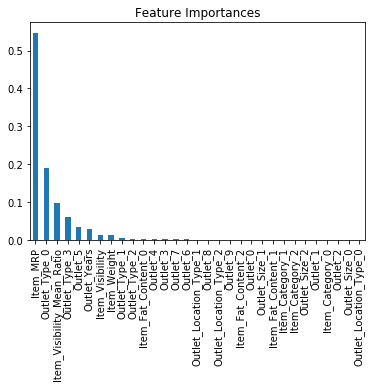

In [66]:
# Run the GB Regressor with the tuned parameters
target='Item_Outlet_Sales'
IDcol=['Item_Identifier','Outlet_Identifier']
predictors = [x for x in train.columns if x not in [target]+IDcol]

alg7 = GradientBoostingRegressor(learning_rate=0.1,n_estimators=60,subsample=0.75,
                                 max_features=20,min_samples_split=260,min_samples_leaf=100,
                                 max_depth=6,random_state=10)

modelfit(alg=alg7, dtrain=train, dtest=test, predictors=predictors, target=target, IDcol=IDcol, filename='../output/GBM_ParamTuning_Output.csv')

coef1 = pd.Series(alg7.feature_importances_, predictors).sort_values(ascending=False)
coef1.plot(kind='bar', title='Feature Importances')

RMSE is  1030.7780523892277
Mean error: 1081.1946737044855
STD error: 47.3642861994534
Min error: 1014.4589092879075
Max error: 1173.2270970286884


c:\users\rajin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


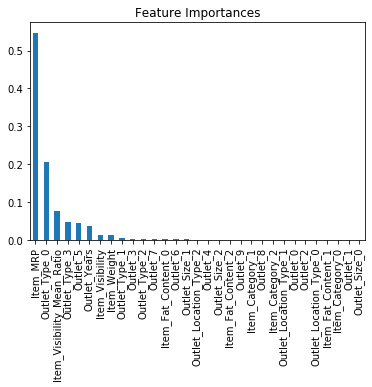

In [67]:
# Now lets tune Learning_Rate by changing value of number of estimators

target='Item_Outlet_Sales'
IDcol=['Item_Identifier','Outlet_Identifier']
predictors = [x for x in train.columns if x not in [target]+IDcol]

alg7 = GradientBoostingRegressor(learning_rate=0.01,n_estimators=600,subsample=0.75,
                                 max_features=20,min_samples_split=260,min_samples_leaf=100,
                                 max_depth=6,random_state=10)

modelfit(alg=alg7, dtrain=train, dtest=test, predictors=predictors, target=target, IDcol=IDcol, filename='../output/GBM_ParamTuning_Output.csv')

coef1 = pd.Series(alg7.feature_importances_, predictors).sort_values(ascending=False)
coef1.plot(kind='bar', title='Feature Importances')

## This was my final submission to AV BigMartSalesIII Competition
You can further try xgboost and see if score improved with that